### RDD to estimate the effect of the lockdown on 25/12/2020 in Quebec: ###
#### by: Amir Reza Roshani Moghaddam ####

### Libraries Imported ###

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.preprocessing import PolynomialFeatures

### Imporing the dataset ###

In [2]:
quebec = pd.read_csv("Quebec_2020.csv")
quebec.describe()
quebec.tail()

,region,date,daily_cases,daily_death,daily_hospitalization,daily_ICU,daily_test_completed
370,QC,2021-01-27,1351,44,-35,4,35878
371,QC,2021-01-28,1267,46,-26,-9,34503
372,QC,2021-01-29,1312,37,-47,-3,33065
373,QC,2021-01-30,1280,39,-54,-8,27517
374,QC,2021-01-31,1211,27,-27,-10,20369


### **Conversion of Date:** ###

In [3]:
quebec["date"] = pd.to_datetime(quebec["date"])

### Simple Plotting ###

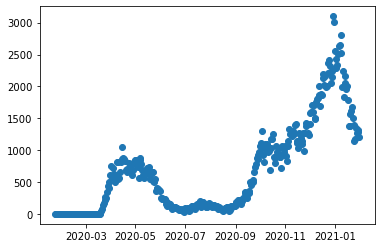

In [4]:
quebec.iloc[337]
plt.scatter(data = quebec, y = 'daily_cases', x = 'date' )

In [5]:
quebec['number'] = list(range(len(quebec)))

In [6]:
quebec.head()

,region,date,daily_cases,daily_death,daily_hospitalization,daily_ICU,daily_test_completed,number
0,QC,2020-01-23,0,0,0,0,2,0
1,QC,2020-01-24,0,0,0,0,0,1
2,QC,2020-01-25,0,0,0,0,0,2
3,QC,2020-01-26,0,0,0,0,0,3
4,QC,2020-01-27,0,0,0,0,1,4


### All data recorded on 25/12/2020 ##

In [7]:
quebec.iloc[337]

region                                    QC
date                     2020-12-25 00:00:00
daily_cases                             2414
daily_death                               41
daily_hospitalization                    -94
daily_ICU                                 -8
daily_test_completed                   25186
number                                   337
Name: 337, dtype: object

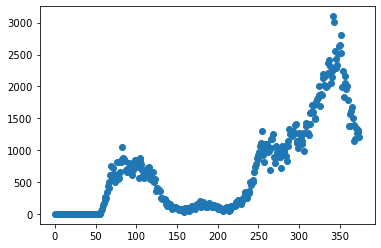

In [8]:
plt.scatter(data = quebec, y = 'daily_cases', x = 'number' )

In [9]:
December = quebec[325:375].copy()
December.tail()

,region,date,daily_cases,daily_death,daily_hospitalization,daily_ICU,daily_test_completed,number
370,QC,2021-01-27,1351,44,-35,4,35878,370
371,QC,2021-01-28,1267,46,-26,-9,34503,371
372,QC,2021-01-29,1312,37,-47,-3,33065,372
373,QC,2021-01-30,1280,39,-54,-8,27517,373
374,QC,2021-01-31,1211,27,-27,-10,20369,374


### Chose a window of 25 days each to clearly see the before and after effects ##

In [10]:
December['num'] = December['number']-350

In [11]:
December

,region,date,daily_cases,daily_death,daily_hospitalization,daily_ICU,daily_test_completed,number,num
325,QC,2020-12-13,1868,43,20,-6,25439,325,-25
326,QC,2020-12-14,1686,34,10,-1,26203,326,-24
327,QC,2020-12-15,1884,47,69,3,34814,327,-23
328,QC,2020-12-16,1865,41,17,3,35838,328,-22
329,QC,2020-12-17,2125,32,26,6,37640,329,-21
330,QC,2020-12-18,2192,53,10,8,36016,330,-20
331,QC,2020-12-19,2027,37,-7,0,32701,331,-19
332,QC,2020-12-20,2165,34,6,5,27268,332,-18
333,QC,2020-12-21,1996,39,38,0,28911,333,-17
334,QC,2020-12-22,2002,38,7,-9,36098,334,-16


In [12]:
Threshold = December['num'] > 0

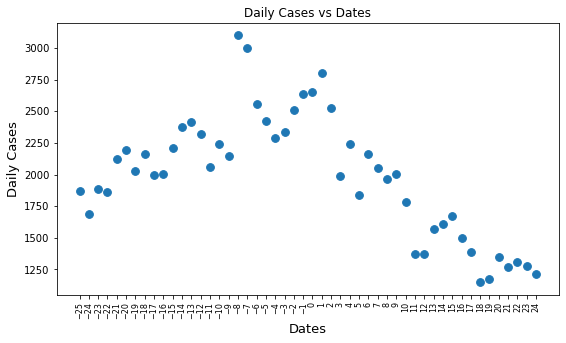

In [13]:
x = December['num']
y = December['daily_cases']
December.plot(kind='scatter', x='num', y='daily_cases', figsize=(9, 5), s=60)
plt.title("Daily Cases vs Dates")
plt.xlabel("Dates", size = 13)
plt.ylabel("Daily Cases", size = 13)
plt.xticks(x, rotation = 'vertical', size = 8)
plt.show()

In [14]:
rdd_December = December.assign(Threshold = December['num']> 0)

In [15]:
rdd_December.iloc[:,-1] = encoder.fit_transform(rdd_December.iloc[:,-1].values)
rdd_December.iloc[:,1] = encoder.fit_transform(rdd_December.iloc[:,1].values)

### Polynomial Feature ###

In [16]:
December['num2'] = np.square(December['num'])

In [17]:
window = rdd_December[(rdd_December['num']>=-30) & (rdd_December['date']<=29)]

result = smf.ols(formula = "daily_cases ~ num + num2   + Threshold", 
                 data = December).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            daily_cases   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     51.40
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           9.92e-15
Time:                        09:48:03   Log-Likelihood:                -343.16
No. Observations:                  50   AIC:                             694.3
Df Residuals:                      46   BIC:                             702.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2477.6701     82.219     30.135      0.000    2312.171    2643.169
Threshold[T.True]  -306.7107    136.904     -2.240      0.030    -582.284     -31.137
num                 -11.5135      4.753     -2.423      0.019     -21.080      -1.947
num2                 -1.6453      0.184     -8.940      0.000      -2.016      -1.275
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.020
Skew:                           0.702   Prob(JB):                       0.0493
Kurtosis:                       3.958   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
December.head()
result.predict()

array([1737.19229314, 1806.29868425, 1872.11446893, 1934.63964716,
       1993.87421897, 2049.81818434, 2102.47154327, 2151.83429576,
       2197.90644182, 2240.68798145, 2280.17891464, 2316.37924139,
       2349.28896171, 2378.9080756 , 2405.23658305, 2428.27448406,
       2448.02177863, 2464.47846678, 2477.64454848, 2487.52002375,
       2494.10489259, 2497.39915499, 2497.40281095, 2494.11586048,
       2487.53830357, 2477.67014023, 2157.80063585, 2141.35125964,
       2121.61127699, 2098.5806879 , 2072.25949238, 2042.64769043,
       2009.74528204, 1973.55226721, 1934.06864595, 1891.29441825,
       1845.22958412, 1795.87414355, 1743.22809654, 1687.2914431 ,
       1628.06418323, 1565.54631692, 1499.73784417, 1430.63876499,
       1358.24907937, 1282.56878732, 1203.59788883, 1121.33638391,
       1035.78427255,  946.94155476])

## Regression Discontinuity with Polynomial Feature ##

Text(0.5, 1.0, 'Regression Discontinuity')

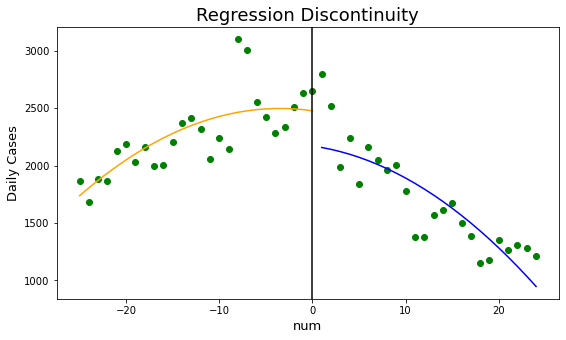

In [19]:
plt.figure(figsize=(9, 5))
plt.scatter(December.num,December.daily_cases, color="green")

plt.plot(December.num[:26], result.predict()[0:26], '-', color="orange")
plt.plot(December.num[26:], result.predict()[26:], '-', color="blue")
plt.xlabel("num", size = 13)
plt.ylabel("Daily Cases", size = 13)
plt.axvline(x=0,color="black", linestyle="-")
plt.title("Regression Discontinuity", fontsize="18")

## Conclusion ##

Our results show that the lockdown (25/12/2022) decreased the number of covid daily cases. Since it takes some time from getting covid to show symptoms and having a positive test, we accounted for a delay in our RD design.We used a polynomial of degree two since including this feature could considerably increase the R_squared and adjusted R_squared.

<br>The coefficient on Threshold(True) is negative and statsitically significant (at 0.05 level of significance). We can also virtually verify that the lockdown indeed decreased the number of cases. X = 0 shows the date that lockdown became effedctive (considering for the lag).So, we have two regression lines, one before and one after the lockdown.